In [1]:
from pathlib import Path

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
DATA_PATH = Path(r"C:\Users\Dmaytryus\Downloads\data")
CB_PATH = DATA_PATH / "ЦБ"

# Data preparation

In [3]:
def data_preparation():
    result = pd.read_csv(CB_PATH / "metalls.csv", sep=",")
    result["Дата"] = pd.to_datetime(result["Дата"], format="%d.%m.%Y")

    for f in CB_PATH.iterdir():
        if f.suffix != ".xlsx":
            continue
        t = pd.read_excel(f)
        valut_name = t.loc[0, "cdx"]
        t[valut_name] = t["curs"] / t["nominal"]
        t = t.rename(columns={"data": "Дата"})
        result = result.merge(t[["Дата", valut_name]], on="Дата")

    return result

In [4]:
# data = data_preparation()
# data.to_pickle("data.pickle")

In [5]:
data = pd.read_pickle("data.pickle")
data

,Дата,Золото,Серебро,Платина,Палладий,Евро,Японская иена,Киргизский сом,Шведская крона,Фунт стерлингов Соединенного королевства,Доллар США,Украинская гривна
0,2010-01-12,"1 095,6300","17,14","1 496,8000","406,37",42.6681,0.318626,0.666175,4.18461,47.4796,29.4283,3.66708
1,2010-01-13,"1 088,7800","17,79","1 523,4900","410,86",42.6149,0.319615,0.665023,4.17156,47.3006,29.3774,3.66074
2,2010-01-14,"1 079,4800","17,54","1 489,5000","401,2",42.9497,0.324761,0.670988,4.20027,48.0686,29.6409,3.64407
3,2010-01-15,"1 076,2900","17,36","1 495,9300","405,92",42.7764,0.320343,0.666212,4.19468,47.9148,29.4299,3.61813
4,2010-01-16,"1 075,8400","17,66","1 530,1200","429,57",42.5905,0.325877,0.668407,4.18624,48.2395,29.5603,3.65845
...,...,...,...,...,...,...,...,...,...,...,...,...
3454,2023-12-26,"6 078,1400","72,33","2 868,1600","3 616,2500",101.5781,0.646531,1.031460,9.16976,116.3960,91.9690,2.44908
3455,2023-12-27,"6 060,8200","72,12","2 859,9900","3 605,9500",101.1178,0.644915,1.030340,9.14362,116.0643,91.7069,2.44405
3456,2023-12-28,"6 060,7000","72,12","2 859,9300","3 605,8800",101.3451,0.642868,1.030060,9.14345,116.0620,91.7051,2.45408
3457,2023-12-29,"6 008,1800","69,8","2 833,6600","3 408,5200",100.5506,0.637516,1.013940,9.02960,115.4899,90.3041,2.40047


# Analysis

In [6]:
def time_series_plot(data, fields=None, driver='matplotlib'):
    fields = fields or list(data.columns)
    if driver == 'matplotlib':
        fig, ax = plt.subplots()
        for f in fields:
            ax.plot(data.index, data[f], label=f)
        ax.legend()
        fig.show()
        fig.savefig('t.png')
    elif driver == 'plotly':
        fig = px.line(data[fields])
        fig.show()

## Drag metals exclude silver

In [7]:
mes = data[["Дата", "Золото", "Платина", "Палладий"]]
mes = mes.set_index('Дата')
mes = mes.map(lambda x: float(x.replace(',', '.').replace(' ', '')))
mes

,Золото,Платина,Палладий
Дата,,,
2010-01-12,1095.63,1496.80,406.37
2010-01-13,1088.78,1523.49,410.86
2010-01-14,1079.48,1489.50,401.20
2010-01-15,1076.29,1495.93,405.92
2010-01-16,1075.84,1530.12,429.57
...,...,...,...
2023-12-26,6078.14,2868.16,3616.25
2023-12-27,6060.82,2859.99,3605.95
2023-12-28,6060.70,2859.93,3605.88


C:\Users\USER\AppData\Local\Temp\ipykernel_4884\518164966.py:8: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


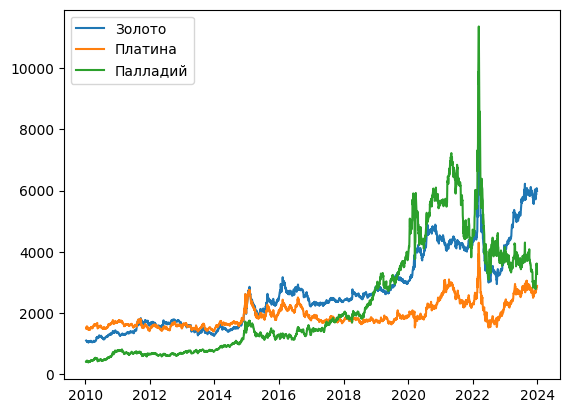

In [8]:
time_series_plot(mes)

In [9]:
time_series_plot(mes, driver='plotly')

# PlotAdapter

In [10]:
import sys
from pathlib import Path

sys.path.append(str(Path('.').absolute().parent / 'plot_adapter'))

from plot import LinePlot

## Simpe

c:\Projects\PlotAdapter\plot_adapter\backends\matplotlib.py:19: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



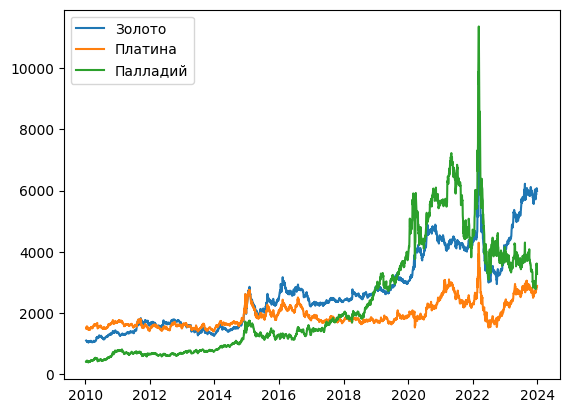

In [11]:
lp = LinePlot("matplotlib")
lp.build(mes)
lp.show()

In [12]:
lp.build(mes, backend="plotly")
lp.show()

## Sum

In [15]:
smes = mes * 1.2
smes = smes.rename(columns={c: f"{c}+20%" for c in smes.columns})
smes

,Золото+20%,Платина+20%,Палладий+20%
Дата,,,
2010-01-12,1314.756,1796.160,487.644
2010-01-13,1306.536,1828.188,493.032
2010-01-14,1295.376,1787.400,481.440
2010-01-15,1291.548,1795.116,487.104
2010-01-16,1291.008,1836.144,515.484
...,...,...,...
2023-12-26,7293.768,3441.792,4339.500
2023-12-27,7272.984,3431.988,4327.140
2023-12-28,7272.840,3431.916,4327.056


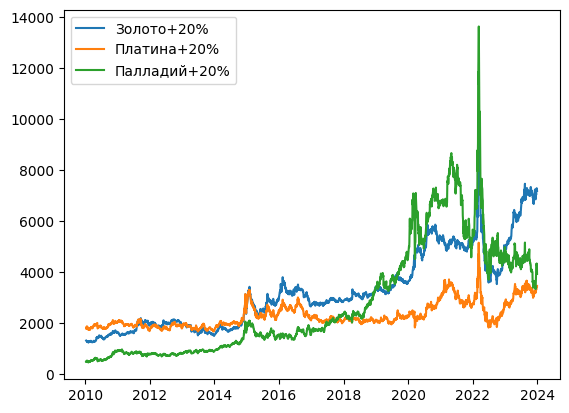

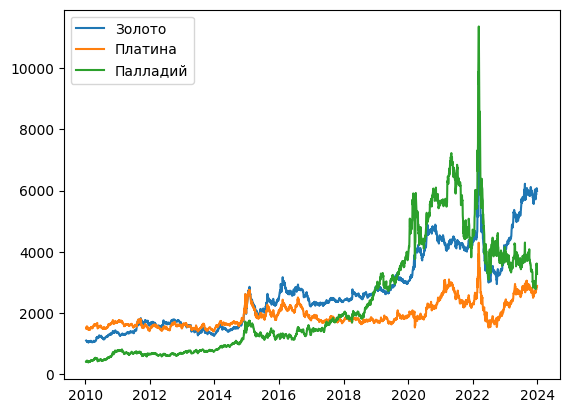

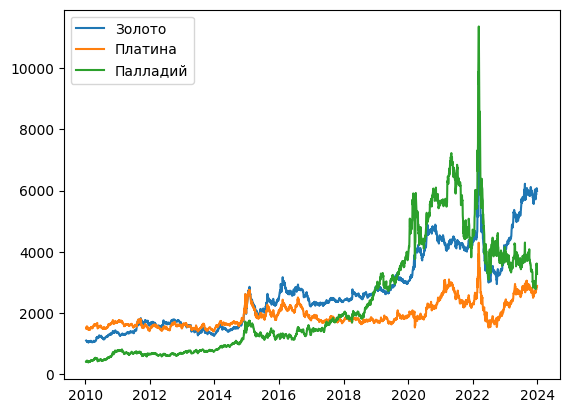

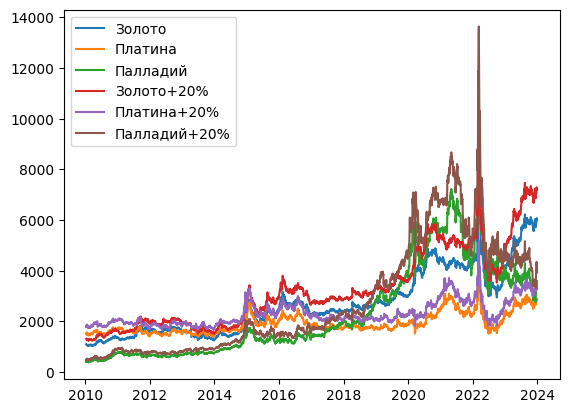

In [17]:
slp = LinePlot("matplotlib")         # Создание объекта графика
slp.build(smes)                      # Построение графика для данных с надбавкой
lp.build(mes, backend="matplotlib")  # Перепостроение графика изначальных данных
                                     #  с использованием бэкэнда matplotlib
s = lp + slp                         # Совмещение графиков
lp.to_file(Path(".") / 'plots' / 'lp.png')
slp.to_file(Path(".") / 'plots' / 'slp.png')
s.to_file(Path(".") / 'plots' / 's.png')